## Define the questions what we want to answer:

What is the distribution of conservation_status for animals?

Are certain types of species more likely to be endangered?

Are the differences between species and their conservation status significant?


Which species were spotted the most at each park?


In [1]:
import pandas as pd
import numpy as np

#load the csv files
obs_df = pd.read_csv("observations.csv")
species_df = pd.read_csv("species_info.csv")

#take an insight into the observations datas
print(obs_df.head(10))
print(obs_df.info())
print(obs_df.describe())

#Check the columns of the dataframes
print(obs_df.columns)
print(species_df.columns)

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [2]:
# see all the national park we have
from IPython.display import display

print(obs_df.park_name.unique())

# see which spicies spotted the most at each park:
most_species_by_park = obs_df.groupby(["park_name","scientific_name"]).observations.sum().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
#display(most_species_by_park)

# Yosemiti most observed species
yosemiti_sort = obs_df[obs_df.park_name == "Yosemite National Park"]
yosemiti_sort = yosemiti_sort.groupby("scientific_name").observations.sum()
print(yosemiti_sort.sort_values(ascending = False))

#Bryce National Park most observed species
Bryce_National_Park_sort = obs_df[obs_df.park_name == "Bryce National Park"]
Bryce_National_Park_sort = Bryce_National_Park_sort.groupby("scientific_name").observations.sum()
Bryce_National_Park_sort = Bryce_National_Park_sort.sort_values(ascending = False)
print(Bryce_National_Park_sort.head(1))


['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
scientific_name
Hypochaeris radicata                                           505
Castor canadensis                                              501
Holcus lanatus                                                 463
Streptopelia decaocto                                          457
Procyon lotor                                                  453
Columba livia                                                  423
Puma concolor                                                  408
Myotis lucifugus                                               396
Nepeta cataria                                                 387
Agrostis variabilis                                            382
Lutra canadensis                                               380
Cervus elaphus                                                 379
Orobanche uniflora                                             3

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

yosemiti_df = obs_df[obs_df.park_name == "Yosemite National Park"]
#print(yosemiti_df)
print(yosemiti_df.scientific_name.unique())




['Prunus subcordata' 'Elymus virginicus var. virginicus'
 'Lysimachia quadrifolia' ... 'Croton monanthogynus'
 'Dicranella rufescens' 'Cucurbita pepo']


                          scientific_name               park_name  \
6682      Ivesia shockleyi var. shockleyi  Yosemite National Park   
12527                Lipocarpha micrantha  Yosemite National Park   
22161  Artemisia arbuscula ssp. arbuscula  Yosemite National Park   
1607                     Trillium rugelii  Yosemite National Park   
16763               Castilleja pallescens  Yosemite National Park   

       observations  
6682            223  
12527           222  
22161           219  
1607            219  
16763           214  


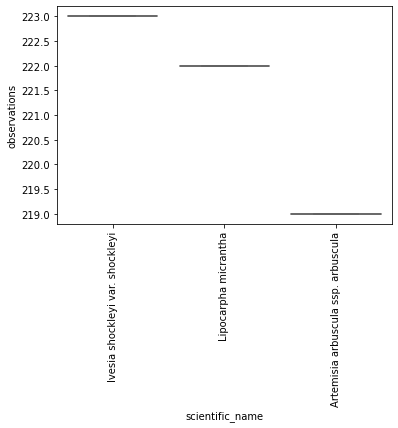

In [4]:
# 3 most observed species in yosemiti
yosemiti_sorted = yosemiti_df.sort_values(by = "observations", ascending = False)
print(yosemiti_sorted.head())
sns.boxplot(x = "scientific_name", y = "observations", data = yosemiti_sorted[0:3], palette = "Accent")
plt.xticks(rotation = 90)
plt.show()

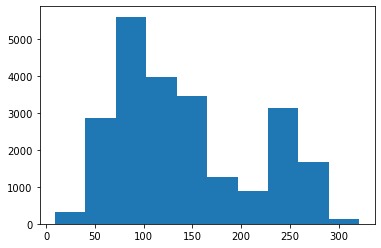

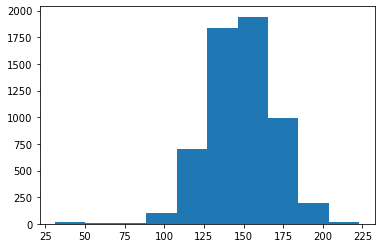

In [5]:
# look at a glance for the observations distribution with histogram

plt.hist(obs_df.observations)
plt.show()
plt.clf()
plt.hist(yosemiti_df.observations)
plt.show()

3314739
park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64
['Bryce National Park' 'Great Smoky Mountains National Park'
 'Yellowstone National Park' 'Yosemite National Park']


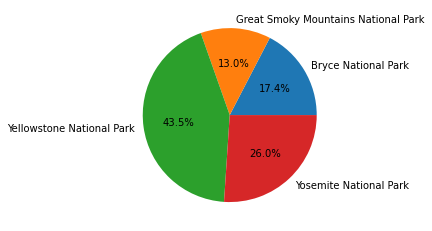

In [7]:
# all observation 
print(obs_df.observations.sum())
# 3314739

#which park has the most observations?

most_observed_park = obs_df.groupby("park_name").observations.sum()
print(most_observed_park)
#Yellowstone National Park 

#Turn Series data into DataFrame
most_observed_park_df = pd.DataFrame(most_observed_park)

#pick the park labels
labels = np.sort(obs_df.park_name.unique())

print(labels)
#see this in a pie chart
plt.pie(most_observed_park_df.observations, labels = labels, autopct = '%0.1f%%')
plt.show()


In [8]:
#see all the species in order all observations
all_obs_in_order = obs_df.groupby("scientific_name").observations.sum().reset_index()

print(all_obs_in_order.sort_values(ascending = False, by="observations"))

#how many observed species we have?
num_all_species = obs_df.scientific_name.nunique()
print(num_all_species)
#5541

#see the duplicates
duplicate_obs = all_obs_in_order.scientific_name.duplicated()
print(duplicate_obs.value_counts())

                                        scientific_name  observations
4993                              Streptopelia decaocto          1785
2452                                     Holcus lanatus          1780
1103                                  Castor canadensis          1725
2555                               Hypochaeris radicata          1720
4179                                      Puma concolor          1711
4109                                      Procyon lotor          1692
1359                                      Columba livia          1653
3322                                   Myotis lucifugus          1547
583                                   Bidens tripartita          1296
3494                                    Oxalis dillenii          1276
4518                              Salvelinus fontinalis          1270
5411                                     Viola arvensis          1261
1145                          Centrocercus urophasianus          1253
635                 

In [9]:
#insight the first 5 row
print(species_df.head(5))

#print(species_df.sort_values(by="scientific_name"))

#check all the species in our dataset
species_duplicate = species_df.scientific_name.duplicated()
print(species_duplicate.value_counts())

print(species_df.category.unique())
#['Mammal' ,'Bird' ,'Reptile' ,'Amphibian' ,'Fish' ,'Vascular Plant', 'Nonvascular Plant


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
False    5541
True      283
Name: scientific_name, dtype: int64
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


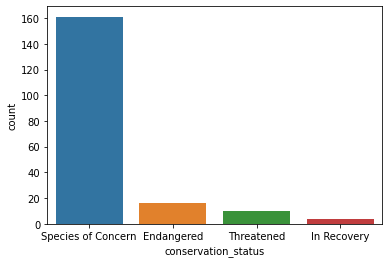

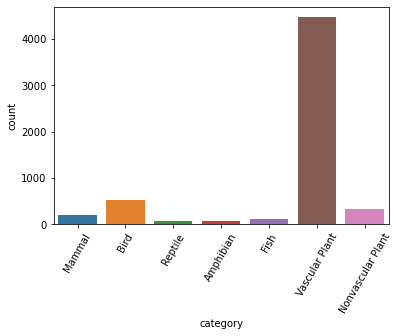

In [10]:
sns.countplot(x ="conservation_status", data = species_df)
print(species_df.conservation_status.unique())
plt.show()
plt.clf()
sns.countplot(x ="category", data = species_df)
plt.xticks(rotation = 60)
plt.show()


In [11]:
in_recovery_species = species_df[species_df.conservation_status == "In Recovery"]
#see the in recovery status species
print(in_recovery_species)
#print(species_df.scientific_name == "Erimonax monachus")

     category           scientific_name               common_names  \
100      Bird  Haliaeetus leucocephalus                 Bald Eagle   
3020   Mammal               Canis lupus            Gray Wolf, Wolf   
3143     Bird   Falco peregrinus anatum  American Peregrine Falcon   
4565     Bird    Pelecanus occidentalis              Brown Pelican   

     conservation_status  
100          In Recovery  
3020         In Recovery  
3143         In Recovery  
4565         In Recovery  


In [14]:
#sort the observations values
all_obs_in_order = all_obs_in_order.sort_values(ascending = False, by = "observations")
all_obs_in_order = all_obs_in_order.reset_index(drop=True)

#print(all_obs_in_order columns)
print(all_obs_in_order.columns)

#see the duplicates
have_duplicated = species_df.duplicated()
print(have_duplicated.value_counts())
have_duplicated = all_obs_in_order.duplicated()
print(have_duplicated.value_counts())



#print(all_obs_in_order.scientific_name[0],all_obs_in_order.observations[0])

#see the DataFrames length
print(len(species_df))
print(len(all_obs_in_order))

#merge the two df
merged_df = pd.merge(species_df,all_obs_in_order,on ="scientific_name", how = "left").reset_index(drop=True)

#check the length
print(len(merged_df))

#check the merged df duplicates
have_duplicated = merged_df.scientific_name.duplicated()
print(have_duplicated.value_counts())

#sorting and re-indexing the df
merged_df = merged_df.sort_values(by="observations", ascending = False).reset_index(drop=True)
#print(merged_df)
print(len(merged_df))
print(merged_df.columns)
merged_df = merged_df.drop_duplicates(subset=["scientific_name"]).reset_index(drop=True)
print(len(merged_df))
#print(merged_df)

Index(['scientific_name', 'observations'], dtype='object')
False    5824
dtype: int64
False    5541
dtype: int64
5824
5541
5824
False    5541
True      283
Name: scientific_name, dtype: int64
5824
Index(['category', 'scientific_name', 'common_names', 'conservation_status',
       'observations'],
      dtype='object')
5541


Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: conservation_status, dtype: int64
0.029751843372629136


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

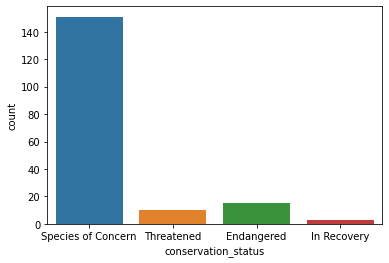

In [18]:
print(merged_df.conservation_status.value_counts())

#Is there a significant difference between Endangered and threatened status?
from scipy.stats import ttest_ind

#use the observation data with each status
endangered_obs = merged_df.observations[merged_df.conservation_status == "Endangered"]
threatened_obs = merged_df.observations[merged_df.conservation_status ==  "Threatened"]

#examine the experience with 0.05 significance threshold
tstat,pval = ttest_ind(endangered_obs,threatened_obs)
print(pval)

# pval 0.029751843372629136 is lower than 0.05, there is significant difference between these status

sns.countplot(x="conservation_status" ,data = merged_df)


In [43]:
# Lets see the ralationship between the categories with tukey's range test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

merged_df.info()
#print(merged_df.observations)
#print(merged_df.category)
tukey_result = pairwise_tukeyhsd(merged_df.observations,merged_df.category, 0.05)
print(tukey_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             5541 non-null   object 
 1   scientific_name      5541 non-null   object 
 2   common_names         5541 non-null   object 
 3   conservation_status  179 non-null    object 
 4   observations         5541 non-null   float64
dtypes: float64(1), object(4)
memory usage: 216.6+ KB
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1            group2      meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------------
        Amphibian              Bird  43.4727 0.1205    -5.471  92.4164  False
        Amphibian              Fish   9.9491    0.9  -48.0573  67.9554  False
        Amphibian            Mammal 106.4505  0.001   51.7956 161.1054   True
        Amphibian Nonv

In [44]:
#What kind of relationship have between categories and conservations_status

from scipy.stats import chi2_contingency

xtab = pd.crosstab(merged_df.category,merged_df.conservation_status)
print(xtab)

chi2,pval,dof,expected = chi2_contingency(xtab)
print(pval)
#print(expected)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                     1            0                   4           2
Bird                          4            3                  68           0
Fish                          3            0                   4           4
Mammal                        6            0                  22           2
Nonvascular Plant             0            0                   5           0
Reptile                       0            0                   5           0
Vascular Plant                1            0                  43           2
2.5230962000680383e-05


In [65]:
#Whats the mean of the all conservation status

endangered = merged_df.observations[merged_df.conservation_status == "Endangered"]
endangered_mean = endangered.mean()
print("The endangered status observation mean : " + str(endangered_mean))


species_of_concern = merged_df.observations[merged_df.conservation_status == "Species of Concern"]
species_of_concern_mean = species_of_concern.mean()
print("The Species of concern status observation mean : " + str(species_of_concern_mean))

threatened = merged_df.observations[merged_df.conservation_status == "Threatened"]
threatened_mean = threatened.mean()
print("The threatened status observation mean : " + str(threatened_mean))

in_recovery = merged_df.observations[merged_df.conservation_status == "In Recovery"]
in_recovery_mean = in_recovery.mean()
print("The In Recovery status observation mean : " + str(in_recovery_mean))

total_obs_mean = merged_df.observations.mean()
print("The Tottal Observation Mean: " + str(total_obs_mean))

The endangered status observation mean : 186.53333333333333
The Species of concern status observation mean : 546.8807947019867
The threatened status observation mean : 333.9
The In Recovery status observation mean : 464.0
The Tottal Observation Mean: 598.2203573362209


In [70]:
#for a better understand we shold check the minimum and maximum value in each status
print("The endangered Maximum value is " + str(endangered.max()) + " and the endangered minimum value is "+ str(endangered.min()))
print("The Species of concern Maximum value is " + str(species_of_concern.max()) + " and the Species of concern minimum value is "+ str(species_of_concern.min()))
print("The Threatened Maximum value is " + str(threatened.max()) + " and the threatened minimum value is "+ str(threatened.min()))


The endangered Maximum value is 715.0 and the endangered minimum value is 131.0
The Species of concern Maximum value is 1547.0 and the Species of concern minimum value is 441.0
The Threatened Maximum value is 813.0 and the threatened minimum value is 242.0


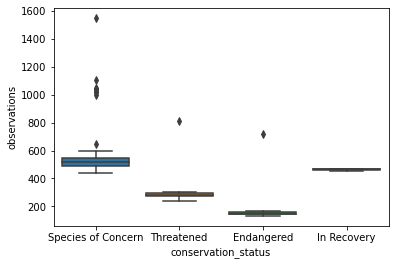

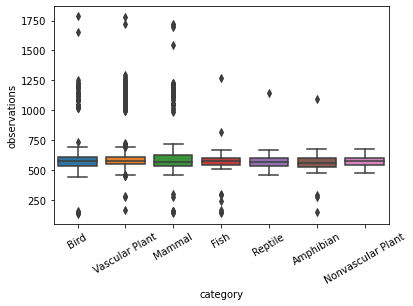

In [76]:
#boxplot to see the range of the observation by conservation status
sns.boxplot(x = merged_df.conservation_status, y = merged_df.observations)
plt.show()

#boxplot to see the range of the observation by category
plt.clf()
sns.boxplot(x = merged_df.category, y = merged_df.observations)
plt.xticks(rotation = 30)
plt.show()